# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
df_sinasc = pd.read_csv('SINASC_RO_2019.csv')
df_sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
df_sinasc_2 = df_sinasc.loc[:,['munResLat', 'IDADEMAE', 'IDADEPAI']]
#df_sinasc_2 = df_sinasc.set_index('munResLat')
mapeamento = {
    -8.76889: -10, -10.88205: -10, -9.90846: -10, -12.74137: -11, -11.43387: -11,
    -11.72226: -11, -10.43595: -10, -10.77388: -10, -10.72357: -10, -11.67754: -11,
    -10.20981: -10, -9.42556: -10, -11.52855: -11, -10.41177: -10, -11.93554: -11,
    -11.69949: -11, -8.78502: -10, -11.17321: -11, -12.06380: -11, -11.72133: -11,
    -13.19503: -11, -12.43601: -11, -9.71667: -10, -13.13056: -11, -11.34413: -11,
    -9.37819: -10, -10.26310: -10, -11.12855: -11, -11.76712: -11, -10.56842: -10,
    -11.04561: -11, -12.55684: -11, -12.13178: -11, -12.99752: -11, -10.61207: -10,
    -9.19187: -10, -10.91553: -10, -11.90842: -11, -11.70974: -11, -10.24873: -10,
    -9.85139: -10, -11.19624: -11, -10.43105: -10, -13.49976: -11, -10.33887: -10,
    -10.93217: -10, -11.91439: -11, -9.70554: -10, -12.17983: -11, -11.82571: -11,
    -13.47656: -11, -11.42684: -11
}

df_sinasc_2['Lat_Cat'] = df_sinasc_2['munResLat'].map(mapeamento)

print(df_sinasc_2.groupby('Lat_Cat')['IDADEMAE'].describe())
print(df_sinasc_2.groupby('Lat_Cat')['IDADEPAI'].describe())

           count       mean       std   min   25%   50%   75%   max
Lat_Cat                                                            
-11.0     8953.0  26.223277  6.295794  12.0  21.0  26.0  31.0  53.0
-10.0    18074.0  26.029656  6.431203  11.0  21.0  25.0  31.0  52.0
          count       mean       std   min   25%   50%   75%   max
Lat_Cat                                                           
-11.0    4843.0  30.823663  7.739584  16.0  25.0  30.0  35.0  86.0
-10.0    2763.0  31.566775  7.804602  15.0  26.0  31.0  36.0  73.0


##### Com esses numeros podemos ver que idempendente da latirude baixa ou alta de RO, a idade média do pai e mãe são iguais ou com pouca diferença. 

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


##### Indice da coluna ('ESTCIVMAE') = Estado Civil da Mãe 

| Código | Estado Civil                         |
|--------|--------------------------------------|
| 1      | Solteira                            |
| 2      | Casada                              |
| 3      | Viúva                               |
| 9      | Ignorado                            |

In [4]:
# ajustando outliner (5)
df_sinasc['ESTCIVMAE'] = df_sinasc['ESTCIVMAE'].replace(5,1)
df_sinasc['ESTCIVMAE'] = df_sinasc['ESTCIVMAE'].replace(4,1)
# ajustando outliner (30)
df_sinasc['QTDFILVIVO'] = df_sinasc['QTDFILVIVO'].replace(30,3)

In [5]:
df_sinasc_3 = df_sinasc.loc[:,['munResArea', 'ESTCIVMAE', 'QTDFILVIVO']]

mapeamento = {
    34096.394: 4, 6896.648: 4, 4426.571: 4, 11518.915: 4, 3792.998: 3, 1457.888: 3, 2944.128: 3, 24855.724: 4,
    1969.850: 3, 6240.932: 4, 3265.809: 3, 8509.270: 4, 4518.035: 4, 10071.643: 4, 7067.025: 4, 7460.219: 4, 
    6843.868: 4, 1758.465: 3, 10959.767: 4, 1703.008: 3, 2783.300: 3, 4987.177: 4, 2651.822: 3, 1451.060: 3, 
    3029.189: 3, 3863.943: 3, 1931.378: 3, 831.857: 3, 3773.505: 3, 3442.005: 3, 1191.875: 3, 5126.723: 4, 
    3958.273: 4, 3060.321: 3, 5067.384: 4, 4081.583: 4, 807.126: 3, 1197.796: 3, 843.446: 3, 2197.413: 3, 
    3135.106: 3, 798.083: 3, 965.676: 3, 1314.352: 3, 1961.778: 3, 459.978: 3, 541.647: 3, 1717.640: 3, 
    2548.683: 3, 605.692: 3, 6014.733: 4, 892.842: 3
}

df_sinasc_3['Area_Cat'] = df_sinasc_3['munResArea'].map(mapeamento)

print('Estado Civil Mãe: \n', df_sinasc_3.groupby('Area_Cat')['ESTCIVMAE'].describe())

print('Quantidade de Filhos Mãe: \n', df_sinasc_3.groupby('Area_Cat')['QTDFILVIVO'].describe())



Estado Civil Mãe: 
             count      mean       std  min  25%  50%  75%  max
Area_Cat                                                      
3.0        8063.0  1.488528  0.691649  1.0  1.0  1.0  2.0  9.0
4.0       18647.0  1.389285  0.761947  1.0  1.0  1.0  2.0  9.0
Quantidade de Filhos Mãe: 
             count      mean       std  min  25%  50%  75%   max
Area_Cat                                                       
3.0        7843.0  0.952442  1.024767  0.0  0.0  1.0  1.0  10.0
4.0       17611.0  1.097553  1.208347  0.0  0.0  1.0  2.0  14.0


##### Com esses numeros, podemos ver que a area com maior quantidade de filhos é a de 4000 mil ou mais e que 75% são casadas ou ignorou essa marcação.

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

<table>
<tr>
<td>

| Código | Duração da Gestação         |
|--------|------------------------------|
| 22     | Menos de 22 semanas         |
| 31     | 22 a 27 semanas             |
| 31     | 28 a 31 semanas             |
| 40     | 32 a 36 semanas             |
| 40     | 37 a 41 semanas             |
| 42     | 42 semanas e mais           |
| 42     | Ignorado                    |

</td>
<td>

| Código | Tipo de Estabelecimento |
|--------|--------------------------|
| 1      | Hospital                |
| 2      | Outro Estab Saúde       |
| 3      | Domicílio               |
| 4      | Outros                  |
| 9      | Ignorado                |

</td>
</tr>
</table>
|

</td>
</tr>
</table>


</td>
</tr>
</table>


</td>
</tr>
</table>



In [6]:
df_sinasc['munResAlt'].dropna().sort_values().unique()

array([ 85.,  87.,  99., 111., 124., 128., 133., 139., 144., 145., 151.,
       153., 154., 155., 157., 158., 161., 163., 166., 170., 177., 178.,
       182., 186., 191., 192., 197., 202., 206., 212., 215., 227., 230.,
       236., 241., 245., 252., 259., 263., 265., 266., 269., 270., 296.,
       338., 340., 397., 419., 595.])

In [7]:
df_sinasc_4 = df_sinasc.loc[:,['munResAlt','LOCNASC', 'GESTACAO']]
# Criando faixas de 200 / 400 / 600
mapeamento = {
    85.: 200, 87.: 200, 99.: 200, 111.: 200, 124.: 200, 
    128.: 200, 133.: 200, 139.: 200, 144.: 200, 145.: 200, 
    151.: 200, 153.: 200, 154.: 200, 155.: 200, 157.: 200, 
    158.: 200, 161.: 200, 163.: 200, 166.: 200, 170.: 200, 
    177.: 200, 178.: 200, 182.: 200, 186.: 200, 191.: 200, 
    192.: 200, 197.: 200, 202.: 400, 206.: 400, 212.: 400, 
    215.: 400, 227.: 400, 230.: 400, 236.: 400, 241.: 400, 
    245.: 400, 252.: 400, 259.: 400, 263.: 400, 265.: 400, 
    266.: 400, 269.: 400, 270.: 400, 296.: 400, 338.: 400, 
    340.: 400, 397.: 400, 419.: 600, 595.: 600
}

#Mapeando a coluna 'GESTACAO'
mapeamento_gestacao = {
    'Menos de 22 semanas': 22,
    '22 a 27 semanas':31,
    '28 a 31 semanas':31,
    '32 a 36 semanas':40,
    '37 a 41 semanas':40,
    '42 semanas e mais':42,
    'Ignorado':42
}
df_sinasc_4['Gestacao_Cat'] = df_sinasc['GESTACAO'].map(mapeamento_gestacao)

#Mapeando a coluna 'munResAlt'
df_sinasc_4['Mun_Alt_Cat'] = df_sinasc_4['munResAlt'].map(mapeamento)

print(df_sinasc_4.groupby('Mun_Alt_Cat')['LOCNASC'].describe())
print(df_sinasc_4.groupby('Mun_Alt_Cat')['Gestacao_Cat'].describe())

               count      mean       std  min  25%  50%  75%  max
Mun_Alt_Cat                                                      
200.0        20827.0  1.011716  0.163561  1.0  1.0  1.0  1.0  4.0
400.0         4396.0  1.010464  0.156409  1.0  1.0  1.0  1.0  4.0
600.0         1804.0  1.009978  0.152299  1.0  1.0  1.0  1.0  4.0
               count       mean       std   min   25%   50%   75%   max
Mun_Alt_Cat                                                            
200.0        19698.0  39.954564  1.019243  22.0  40.0  40.0  40.0  42.0
400.0         4296.0  39.982076  0.944517  22.0  40.0  40.0  40.0  42.0
600.0         1801.0  39.992782  0.768442  31.0  40.0  40.0  40.0  42.0


##### Esses dados mostram que idempendente da latitude as mães tem seus partos no Hospital e a grande maioria com 40 semanas ou menos!

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


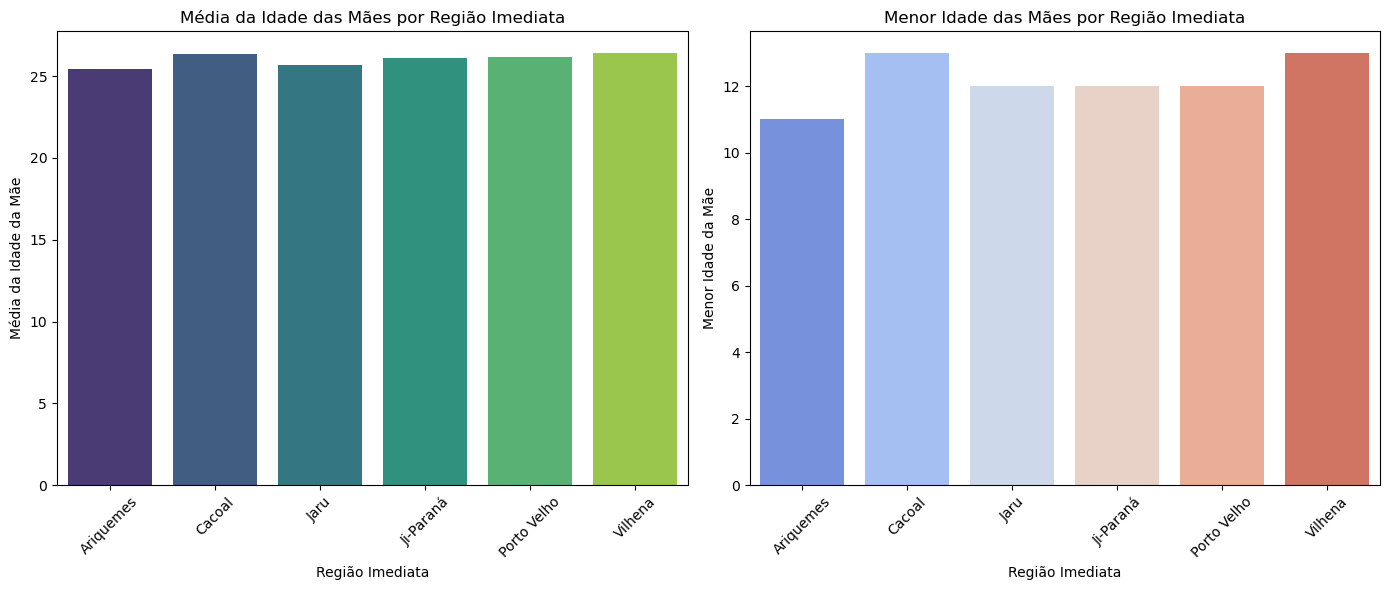

In [8]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

df_sinasc_5 = df_sinasc.loc[:,['munResNome', 'IDADEMAE']]
df_sinasc_5['Mun_Ime_Cat'] = df_sinasc_5['munResNome'].map(imediatas)
idade_media_mae_imediatas = df_sinasc_5.groupby('Mun_Ime_Cat')['IDADEMAE'].mean()
idade_minima_mae_imediatas = df_sinasc_5.groupby('Mun_Ime_Cat')['IDADEMAE'].min()

# Definir o tamanho da figura para dois gráficos lado a lado
plt.figure(figsize=(14, 6))

# Gráfico 1: Média da Idade da Mãe por Região Imediata
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, gráfico 1
sns.barplot(x=idade_media_mae_imediatas.index, y=idade_media_mae_imediatas.values, hue=idade_media_mae_imediatas.index, palette="viridis", legend=False)
plt.xlabel("Região Imediata")
plt.ylabel("Média da Idade da Mãe")
plt.title("Média da Idade das Mães por Região Imediata")
plt.xticks(rotation=45)

# Gráfico 2: Menor Idade da Mãe por Região Imediata
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, gráfico 2
sns.barplot(x=idade_minima_mae_imediatas.index, y=idade_minima_mae_imediatas.values, hue=idade_minima_mae_imediatas.index, palette="coolwarm", legend=False)
plt.xlabel("Região Imediata")
plt.ylabel("Menor Idade da Mãe")
plt.title("Menor Idade das Mães por Região Imediata")
plt.xticks(rotation=45)

# Ajustar o layout para não sobrepor os gráficos
plt.tight_layout()

# Mostrar os gráficos
plt.show()


##### Podemos ver nos graficos que de acordo com a região imediata em Rondonia, Ariquemes tem as mães mais novas do estado. 

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [17]:
# Mapeameando o nivel de escolaridade da mãe
Mapeamento_Esc_Mae = {
    '8 a 11 anos':11,
    '12 anos ou mais':12,
    '4 a 7 anos':7,
    '1 a 3 anos':3,
    'Nenhuma':0
}
df_sinasc['Esc_Mae'] = df_sinasc['ESCMAE'].map(Mapeamento_Esc_Mae)
df_sinasc_6 = df_sinasc.loc[:,['Esc_Mae','munResNome', 'QTDFILVIVO', 'IDADEMAE', 'IDADEPAI']]

# Mapeando o nivel de IDH dos Municipios 
mapeamento_IDH = {
    'Porto Velho':'Alto',
    'Cacoal':'Alto',
    'Ariquemes':'Alto',
    'Ji-Paraná':'Alto',
    'Vilhena':'Alto',
    'Rolim de Moura':'Médio',
    'Pimenta Bueno':'Médio',
    'Jaru':'Médio',
    'Ouro Preto do Oeste':'Médio',
    'Guajará-Mirim':'Médio',
    'Nova Mamoré':'Baixo',
    'Buritis':'Baixo',
    "Machadinho D'Oeste":'Baixo',
    'Alto Paraíso':'Baixo',
    'Campo Novo de Rondônia':'Baixo'
}
df_sinasc_6['Mun_Res_Nome_IDH'] = df_sinasc_6['munResNome'].map(mapeamento_IDH)

idh_RO_M_1 = df_sinasc_6.groupby('Mun_Res_Nome_IDH')['Esc_Mae'].describe()
print(idh_RO_M_1)

idh_RO_M_2 = df_sinasc_6.groupby('Mun_Res_Nome_IDH')['QTDFILVIVO'].describe()
print(idh_RO_M_2)


                    count       mean       std  min   25%   50%   75%   max
Mun_Res_Nome_IDH                                                           
Alto              15101.0  10.399046  1.991428  0.0  11.0  11.0  11.0  12.0
Baixo              1893.0   9.929741  2.186550  0.0   7.0  11.0  11.0  12.0
Médio              3812.0  10.498688  1.841744  0.0  11.0  11.0  11.0  12.0
                    count      mean       std  min  25%  50%  75%   max
Mun_Res_Nome_IDH                                                       
Alto              14166.0  1.052661  1.145741  0.0  0.0  1.0  2.0  12.0
Baixo              1628.0  1.226044  1.198959  0.0  0.0  1.0  2.0  10.0
Médio              3798.0  1.012375  1.177260  0.0  0.0  1.0  2.0  11.0


##### Não existe relação entre o indece de IDH-M com a escolaridade baixa ou alta da mãe, os dados mostram que indenpendente do nivel de IDH-M a quantidade de filhos em sua maioria é 2. 

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [12]:
# Mapeando IFDM de RO
mapeamento_ifdm_ro = {
    'Porto Velho': 'Alto',
    'Ji-Paraná': 'Alto',
    'Ariquemes': 'Alto',
    'Cacoal': 'Moderado',
    'Vilhena': 'Moderado',
    'Ouro Preto do Oeste': 'Moderado',
    'Jaru': 'Moderado',
    'Rolim de Moura': 'Moderado',
    'Guajará-Mirim': 'Regular',
    'Espigão do Oeste': 'Regular',
    'Machadinho d\'Oeste': 'Regular',
    'Campo Novo de Rondônia': 'Baixo',
    'Chupinguaia': 'Baixo',
    'Nova União': 'Baixo'
}
df_sinasc_6['Mun_IFDM_RO'] = df_sinasc['munResNome'].map(mapeamento_ifdm_ro)

Mun_RO_IFDM = df_sinasc_6.groupby('Mun_IFDM_RO')['Esc_Mae'].describe()
print(Mun_RO_IFDM)

Mun_RO_IFDM_2 = df_sinasc_6.groupby('Mun_IFDM_RO')['QTDFILVIVO'].describe()
print(Mun_RO_IFDM_2)

               count       mean       std  min   25%   50%   75%   max
Mun_IFDM_RO                                                           
Alto         12149.0  10.269405  2.087627  0.0  11.0  11.0  11.0  12.0
Baixo          427.0  10.248244  1.907292  3.0  11.0  11.0  11.0  12.0
Moderado      5373.0  10.769775  1.609390  0.0  11.0  11.0  12.0  12.0
Regular        776.0  10.222938  2.004006  0.0  11.0  11.0  11.0  12.0
               count      mean       std  min  25%  50%  75%   max
Mun_IFDM_RO                                                       
Alto         11214.0  1.090423  1.170794  0.0  0.0  1.0  2.0  12.0
Baixo          394.0  1.045685  1.099592  0.0  0.0  1.0  2.0   8.0
Moderado      5371.0  0.896481  0.998177  0.0  0.0  1.0  1.0  10.0
Regular        769.0  1.543563  1.694350  0.0  0.0  1.0  2.0  11.0


##### Com base nos dados, não existe relação de escolaridade ou quantidade de filhos de acordo com o IFDM.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [20]:
mapeamento_pib_ro = {
    'Porto Velho': 'Alto',
    'Ji-Paraná': 'Alto',
    'Vilhena': 'Alto',
    'Cacoal': 'Moderado',
    'Ariquemes': 'Moderado',
    'Rolim de Moura': 'Moderado',
    'Jaru': 'Moderado',
    'Pimenta Bueno': 'Moderado',
    'Guajará-Mirim': 'Regular',
    'Ouro Preto do Oeste': 'Regular',
    'Espigão d\'Oeste': 'Regular',
    'Buritis': 'Regular',
    'São Miguel do Guaporé': 'Regular',
    'Machadinho do Oeste': 'Regular',
    'Alta Floresta do Oeste': 'Regular',
    'Presidente Médici': 'Regular',
    'Nova Mamoré': 'Regular',
    'Cerejeiras': 'Regular',
    'Candeias do Jamari': 'Regular',
    'Colorado do Oeste': 'Regular',
    'São Francisco do Guaporé': 'Regular',
    'Nova Brasilândia do Oeste': 'Regular',
    'Cujubim': 'Regular',
    'Alto Paraíso': 'Regular',
    'Monte Negro': 'Regular'
}

df_sinasc_6['Mun_PIB_RO'] = df_sinasc['munResNome'].map(mapeamento_pib_ro)

Mun_RO_PIB = df_sinasc_6.groupby('Mun_PIB_RO')['QTDFILVIVO'].describe()
print(Mun_RO_PIB)

Mun_RO_PIB_Esc = df_sinasc_6.groupby('Mun_PIB_RO')['Esc_Mae'].describe()
print(Mun_RO_PIB_Esc)

Mun_RO_PIB_Esc_Idade = df_sinasc_6.groupby('Mun_PIB_RO')['IDADEMAE'].describe()
print(Mun_RO_PIB_Esc_Idade)

Mun_RO_PIB_Esc_Idade_Pai= df_sinasc_6.groupby('Mun_PIB_RO')['IDADEPAI'].describe()
print(Mun_RO_PIB_Esc_Idade_Pai)

              count      mean       std  min  25%  50%  75%   max
Mun_PIB_RO                                                       
Alto        11076.0  1.085681  1.167571  0.0  0.0  1.0  2.0  12.0
Moderado     5493.0  0.906973  1.014234  0.0  0.0  1.0  1.0   9.0
Regular      4497.0  1.172337  1.278365  0.0  0.0  1.0  2.0  11.0
              count       mean       std  min   25%   50%   75%   max
Mun_PIB_RO                                                           
Alto        12005.0  10.396002  1.987830  0.0  11.0  11.0  11.0  12.0
Moderado     5503.0  10.481737  1.921294  0.0  11.0  11.0  11.0  12.0
Regular      4764.0  10.211167  2.038140  0.0  11.0  11.0  11.0  12.0
              count       mean       std   min   25%   50%   75%   max
Mun_PIB_RO                                                            
Alto        12209.0  26.337128  6.460412  12.0  21.0  26.0  31.0  47.0
Moderado     5527.0  26.107472  6.274545  12.0  21.0  26.0  31.0  47.0
Regular      4805.0  25.759417  6.43

##### O PIB do municipio 